Outline:

- Data 
- Scaling
- Train, test split
- PCA on 2 dimensions / 3 dimensions (Optional)
- Plot on PCA results (Optional)
- t-SNE in 2d (Optional)

- Try k-nn with the simple k = 5 (since we have 4 labels) (It is nice to scale the data in order to compute the distances)
- Grid search between "1 and 20" and "uniform vs distance" based weights 
- Randomized Grid search between "1 and 20" and "uniform vs distance" based weights

- Try SVM 
- Confusion Matrix, Accuracy, Precision ??? (For multiple classes??), ROC OVO multiclass


In [33]:
#Major imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preprocessing

We first download the data and prepare them to be fed into the Classifiers

In [26]:
df = pd.read_csv("mldata_0003159045.csv")

df.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,3,-1.869350,3.559079,-1.145611,-3.840056,0.627002,-1.486503,-1.116860,-0.501075,...,0.204709,-0.731950,-0.938675,2.816732,1.072657,2.367081,-1.187479,0.748156,-0.185988,0.226795
1,1,3,0.619341,2.486762,0.009735,-4.773803,-0.377366,1.428685,-0.278266,-0.674745,...,-1.420404,-1.188352,-0.840943,0.824977,1.991146,0.333274,2.879939,0.256975,0.074700,0.467322
2,2,2,5.821832,4.911420,1.803447,3.634988,0.038141,0.850619,-1.253547,0.490986,...,1.316830,-0.130740,-0.987596,-2.987699,2.098421,0.926776,-0.121936,-0.156706,0.131401,0.518553
3,3,2,1.076023,-3.296251,0.764935,-5.657998,-0.250583,1.352594,0.517906,-0.542137,...,-2.347694,0.018713,0.480454,1.733611,-0.397137,0.177095,1.015141,-0.012718,0.042500,-0.161039
4,4,3,0.231785,1.866774,-3.300366,-7.653516,-0.097803,-0.822568,0.894497,0.640398,...,0.512948,-0.421881,1.318767,-1.513659,0.855297,-0.219029,2.704655,-0.442440,-0.032237,0.096417


In [4]:
df.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,699.5000,1.480714,0.717343,0.528495,0.028657,-0.008994,-0.027702,0.121780,0.113305,0.076414,...,0.173745,-0.142779,0.027352,-0.492885,0.106520,0.139698,0.444864,0.048502,0.017547,0.100318
std,404.2895,1.104762,2.348130,3.124755,1.792042,6.383400,0.481900,1.187348,0.803036,0.923880,...,2.265375,1.010277,1.195219,2.360631,1.288370,1.140858,2.343031,0.412483,0.127287,1.119546
min,0.0000,0.000000,-7.023354,-9.951135,-6.282387,-23.267880,-1.545825,-5.015833,-3.001043,-3.177070,...,-7.172480,-3.387446,-5.482780,-7.846504,-4.038293,-3.728404,-7.693023,-1.394450,-0.455536,-3.670045
25%,349.7500,1.000000,-0.866371,-1.620745,-1.175103,-4.487222,-0.365906,-0.687716,-0.441010,-0.570926,...,-1.360553,-0.827322,-0.656273,-2.066851,-0.782531,-0.640120,-1.064708,-0.216123,-0.067654,-0.648519
50%,699.5000,1.000000,0.641637,0.608123,0.009671,-0.104565,-0.014860,0.157844,0.114960,0.071775,...,0.156540,-0.162254,0.034969,-0.592626,0.047029,0.105411,0.266358,0.044178,0.016816,0.085650
75%,1049.2500,2.000000,2.135757,2.527115,1.197216,4.363047,0.322528,0.874309,0.650354,0.730473,...,1.735518,0.554277,0.830831,0.970230,1.007300,0.924540,1.876943,0.317549,0.101601,0.873565
max,1399.0000,3.000000,8.700184,14.646834,6.122488,23.904006,1.349306,3.763556,2.856206,3.193338,...,8.387536,3.300346,3.700360,7.313998,4.096346,4.015861,8.337685,1.495295,0.482167,3.697693


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis = 1), df["label"], test_size = 0.10, random_state = 12)

print( f"X_train size : {X_train.shape}   X_test size : {X_test.shape}    y_train size : {y_train.shape}    y_test size : {y_test.shape}")

X_train size : (1256, 21)   X_test size : (140, 21)    y_train size : (1256,)    y_test size : (140,)


We now scale the data with a Standard scaler in order to obtain 0 mean and variance 1

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_train_scaled

array([[ 1.80255923,  0.31516871, -0.61231149, ..., -0.17040367,
         1.06806907, -0.10504337],
       [-0.37111545, -0.68759637, -0.95640305, ...,  1.97566443,
        -0.45540942, -0.53354036],
       [ 0.18076468,  0.42633543,  0.46995052, ..., -0.40358759,
         1.17824826, -1.58279596],
       ...,
       [ 0.00861193, -1.40492975, -1.07525152, ..., -0.72464195,
        -0.39111944,  0.80854537],
       [-0.82291362,  0.79109147, -0.35460416, ...,  0.36553233,
         2.02624354, -2.10233973],
       [-1.03546723,  2.38750906, -0.48104943, ..., -2.48578787,
         0.07311196, -0.99202728]])

## Data analisys and visualisation

We now perform some data analisys on the given dataset in order to explore it and eventually capture some features from basic visualisations

### 2d PCA
Strating from PCA we first analise the 2 features that best explain the variance of the data and we plot them in a 2d plot in order to eventually capture some insights.

In [51]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components= 2)

X_train_projected_2d = pca_2d.fit_transform(X_train)

pca_2d.explained_variance_ratio_.sum()


0.9997501999276585

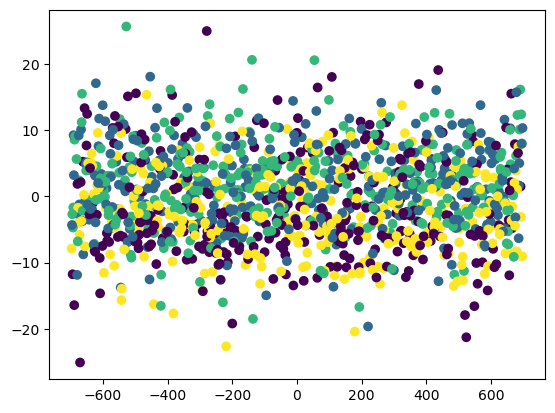

In [52]:
plt.scatter(X_train_projected_2d[:, 0], X_train_projected_2d[:, 1],  c=y_train)
plt.show()

Even though the dimensions expressed in the pca explained almost 99% of the variance they failed at classifying the points in a linear manner. Thus taking us to make further analysis.

### 3d PCA
So we porform a 3d PCA in order to try to find linear classification boundaries

In [42]:
pca_3d = PCA(n_components= 3)

X_train_projected_3d = pca_3d.fit_transform(X_train)

pca_3d.explained_variance_ratio_.sum()

0.9998170226034846

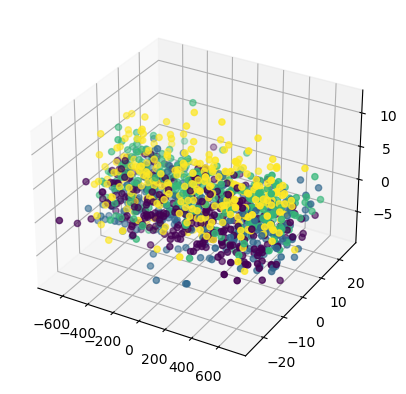

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_projected_3d[:, 0], X_train_projected_3d[:, 1], X_train_projected_3d[:, 2], c = y_train)

plt.show()

As expected the same thing happened to the the 3d pca resulting in an uncapability to split the data linearly with this method.

## 2d t-SNE
We now employ another technique to try to visualise the classification boundaries before passing to more advanced methods.

In [56]:
from sklearn.manifold import TSNE

#Take a look at the attributes here !!!
X_train_reduced = TSNE(n_components=2 , learning_rate='auto', init='random', perplexity = 60).fit_transform(X_train)

X_train_reduced.shape

(1256, 2)

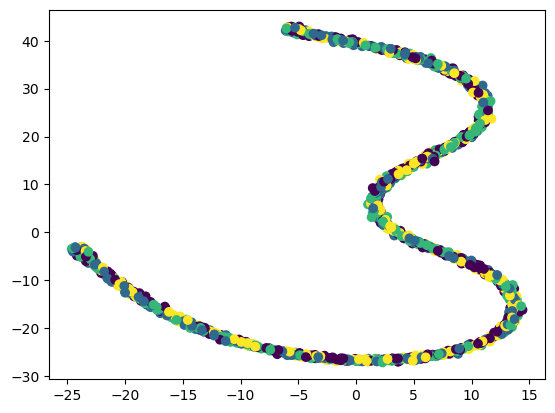

In [58]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1],  c=y_train)
plt.show()

plt.show()

Resulting in an unuseful technique once again in this problem.

## K-Nearest Neighbors

We decide to employ one among the most used classification algorithms in the world.

In [75]:
#Since in the kNN algorithm we deal with distances the use of scaled data is a suitable choice in order to give every feature the same importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [72]:

knn_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
     ("knn", KNeighborsClassifier())
])


knn_param_grid ={ 
    "knn__n_neighbors" : range(1,120) ,
    "knn__weights" : ["uniform", "distance"]
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv = 3, scoring='neg_root_mean_squared_error')
knn_grid_search.fit(X_train, y_train) #Here we use the raw data since scaling is performed in the pipeline itself

print("Best HyperParameters: ", knn_grid_search.best_params_)
print("Best Negative RMSE: ", - knn_grid_search.best_score_)

Best HyperParameters:  {'knn__n_neighbors': 48, 'knn__weights': 'distance'}
Best Negative RMSE:  0.9106162726152229


In [ ]:
#implement the confusion matrix and compute the accuracy

So we find that the best estimator for the grid search cross validation gives that the best accuracy is obtained with 48 neighbors for which we give a weight proportional to the inverse of the distance (in order to deal with the relative high dimension of the space)

## Support Vector Machine

We now use the Support Vector Machines with linear kernel in order to solve the same classification problem and address the best algorithm to perform the task.

In [76]:
from sklearn.svm import LinearSVC
from scipy.stats import uniform

We use the original data first and feed it directly in the model. So we create two different pipelines for the data that will be later evaluated.

Watch out that hinge cannot be used when the dual = False (neither with "l1" nor with "l2"), hence the space of hyperparameters pins down to just choosing l1 and l2 penalty with "squared_hinge" loss on a given interval for C (the regularization parameter).

In [87]:
# Watch out here!!! The l1 penalty and the hinge penalty cannot be used simultaneously so we split the search in two (search1 with hinge vs squared_hinge)
# Furthermore we choose ovr for the multiclass attribute to the end of easing the computation
svm_param_grid = {
    "penalty" : ["l1", "l2"],
    "C" : uniform(1.0, 10)     #We arrive up to 10 in order to have margins large enough !!!
}

svm_grid_search = RandomizedSearchCV(LinearSVC(loss = "squared_hinge", dual = False, max_iter= 30000), svm_param_grid, scoring= "neg_root_mean_squared_error") #Here we put False as value for the dual since our dataset is composed of an higher number of samples (1256 in the training set) vs the number of features (20)
svm_grid_search.fit(X_train, y_train)

print(f"Best HyhperParameters: {svm_grid_search.best_params_}")
print(f"Best Negative RMSE: {- svm_grid_search.best_score_}")

Best HyhperParameters: {'C': 1.1456906297578275, 'penalty': 'l1'}
Best Negative RMSE: 0.8587415358566792
